In [1]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [3]:
num_folds = 10
kfold = KFold(n_splits=10)

In [4]:
model = KNeighborsClassifier(n_neighbors=14)
results = cross_val_score(model, X, Y, cv=kfold)

In [5]:
print(results.mean())

0.7564764183185235


### Grid Search for Algorithm Tuning

In [6]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [8]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [9]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [10]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


### Visualizing the CV results

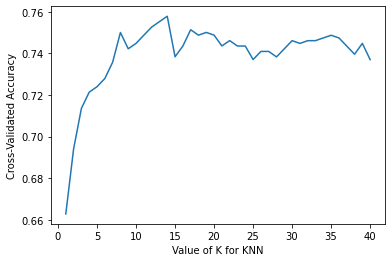

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()